In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotnine as p9
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

In [5]:
def download_and_read_excel(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.xls'):
            df = pd.read_excel(file)
            return df

In [6]:
df_superstore_data = download_and_read_excel('juhi1994/superstore')
df = df_superstore_data.copy()

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# we havn't missings and obvious duplicates in df

In [12]:
# 2. Data Visualization with Plotly:
# - Create an interactive line chart to show sales trends over the years.

In [13]:
df['Year'] = df['Order Date'].dt.year

In [14]:
fig = px.line(df, x='Order Date', y='Sales', title='Sales Trends Over the Years')
fig.show()

In [15]:
# - Build an interactive map to visualize sales distribution by country.
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Sales', hover_name='Country', title='Sales Distribution by Country')
fig.show()

C:\Users\kyana\AppData\Local\Temp\ipykernel_19120\3786164667.py:8: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



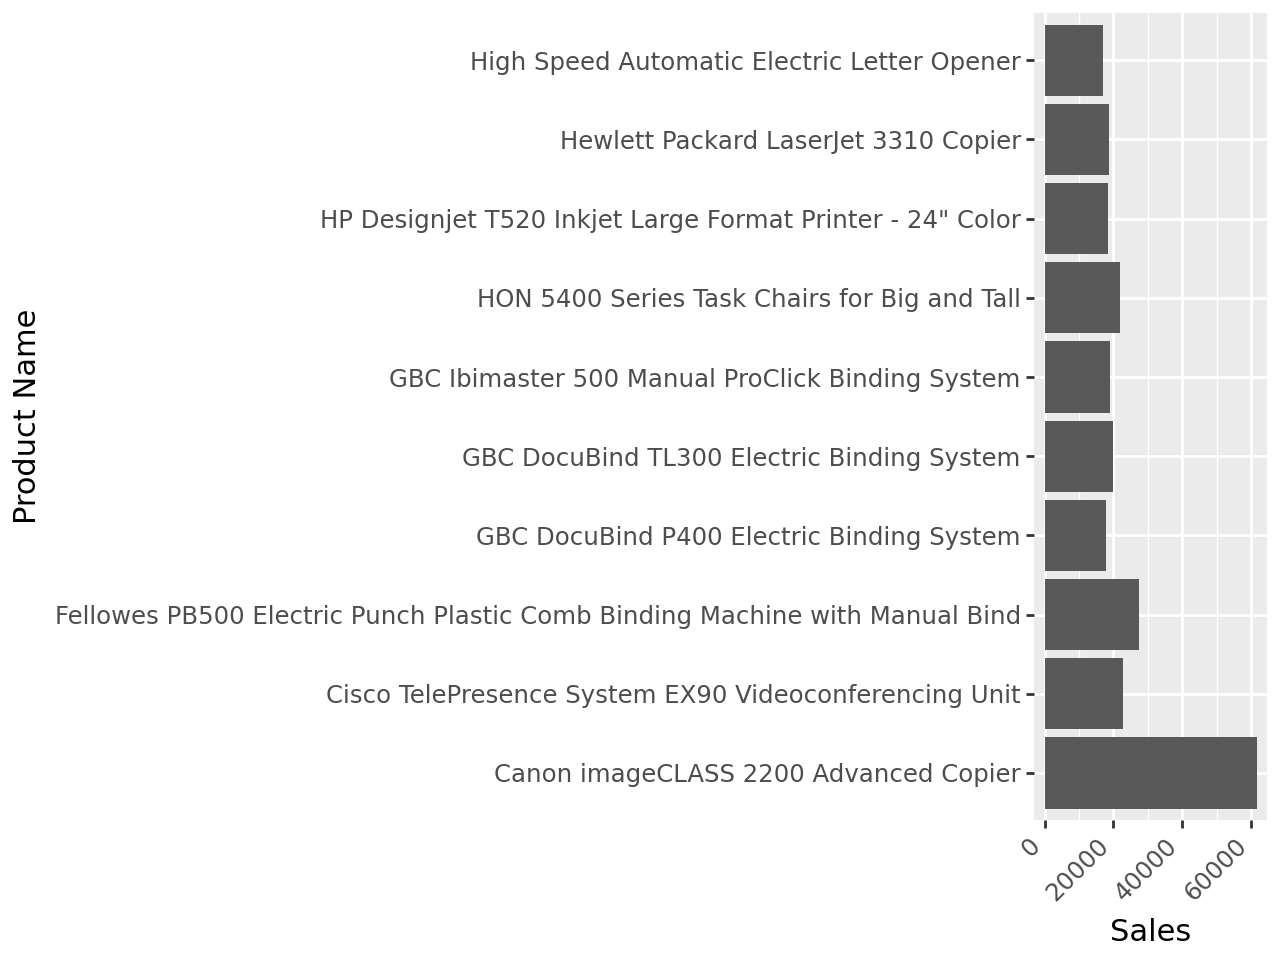

In [19]:
# 3. Data Visualization with Plotnine:
# - Use Plotnine to generate a bar chart showing top 10 products by sales.
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
p = p9.ggplot(top_10_products, p9.aes(x='Product Name', y='Sales')) + \
    p9.geom_bar(stat='identity') + \
    p9.coord_flip() + \
    p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1))
print(p)

C:\Users\kyana\AppData\Local\Temp\ipykernel_19120\2872284947.py:6: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



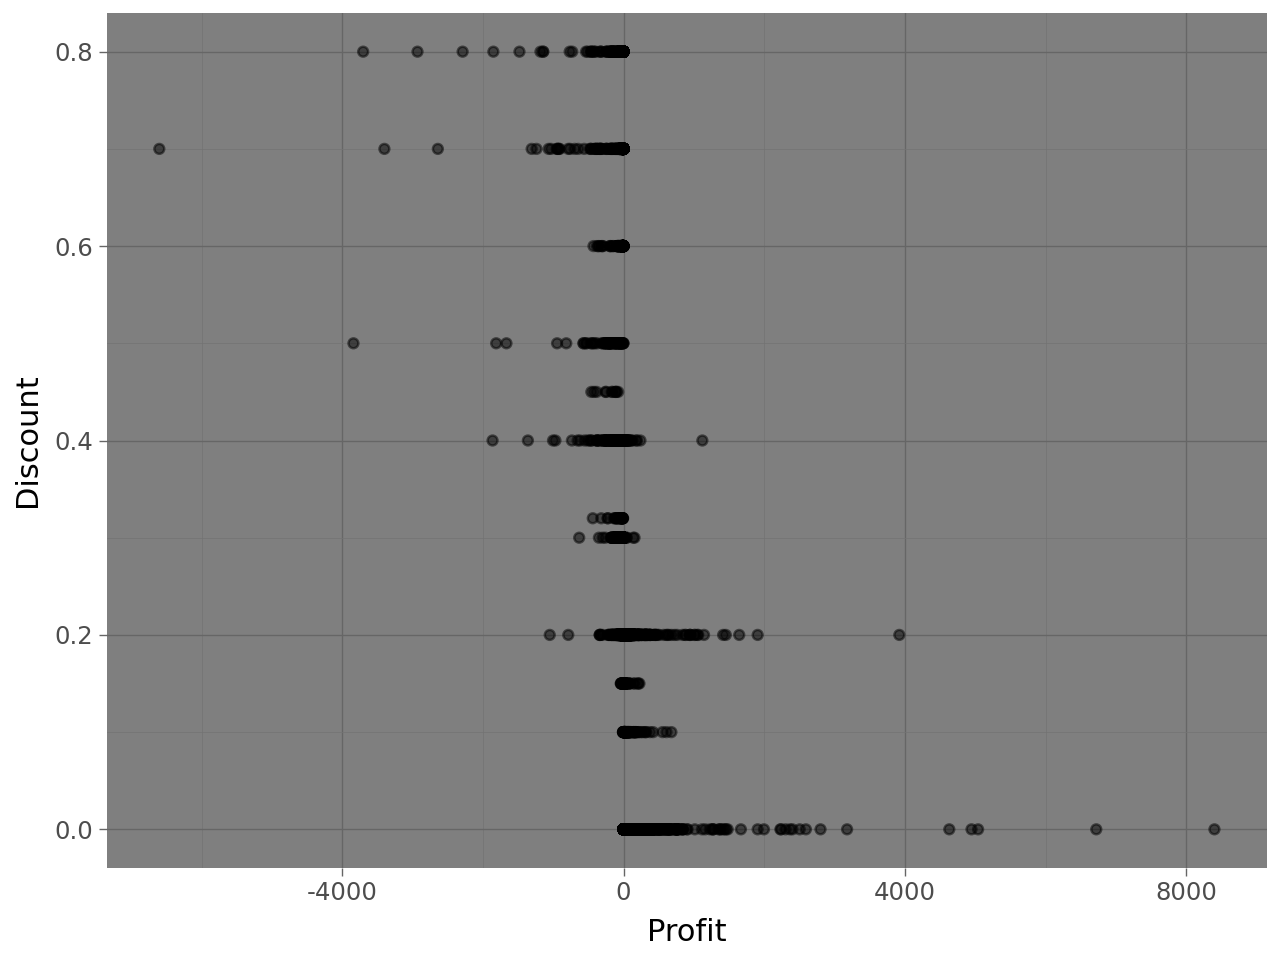

In [18]:
# - Create a scatter plot to analyze the relationship between profit and discount.
p = p9.ggplot(df, p9.aes(x='Profit', y='Discount')) + \
    p9.geom_point(alpha=0.5) + \
    p9.theme_dark()
print(p)

In [20]:
# 4. Comparative Analysis:
# - Compare the insights gained from Plotly and Plotnine visualizations.
# - Document your observations about the ease of use and effectiveness of both tools.

1. I didn't like Plotly and Plotline, looks awful and its lagging.
2. Line chart from step 2 useless. 
3. Interactive map to visualize sales distribution by country lagging but i see that sales was in USA (northwest, south)
4. The best selling product is Canon ImageClass copier
5. I think we can see negative correlation between discount and profit. 